TASK 1

In [2]:
import pandas as pd

In [4]:
# Load the dataset
df = pd.read_csv('loan_sanction_test.csv')


In [5]:
# Display the first 5 rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# Check for missing values
df.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
(df.isnull().mean() * 100).round(2)


Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

In [15]:
# Handle categorical columns – fill with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Handle numeric columns – fill with median
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)


In [18]:
# Confirm no missing values left
df.isnull().sum().sum()


np.int64(0)

In [7]:
# Summary statistics
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


TASK 2

📈 Step 4: Univariate Analysis


4.1 Histograms for Numeric Columns



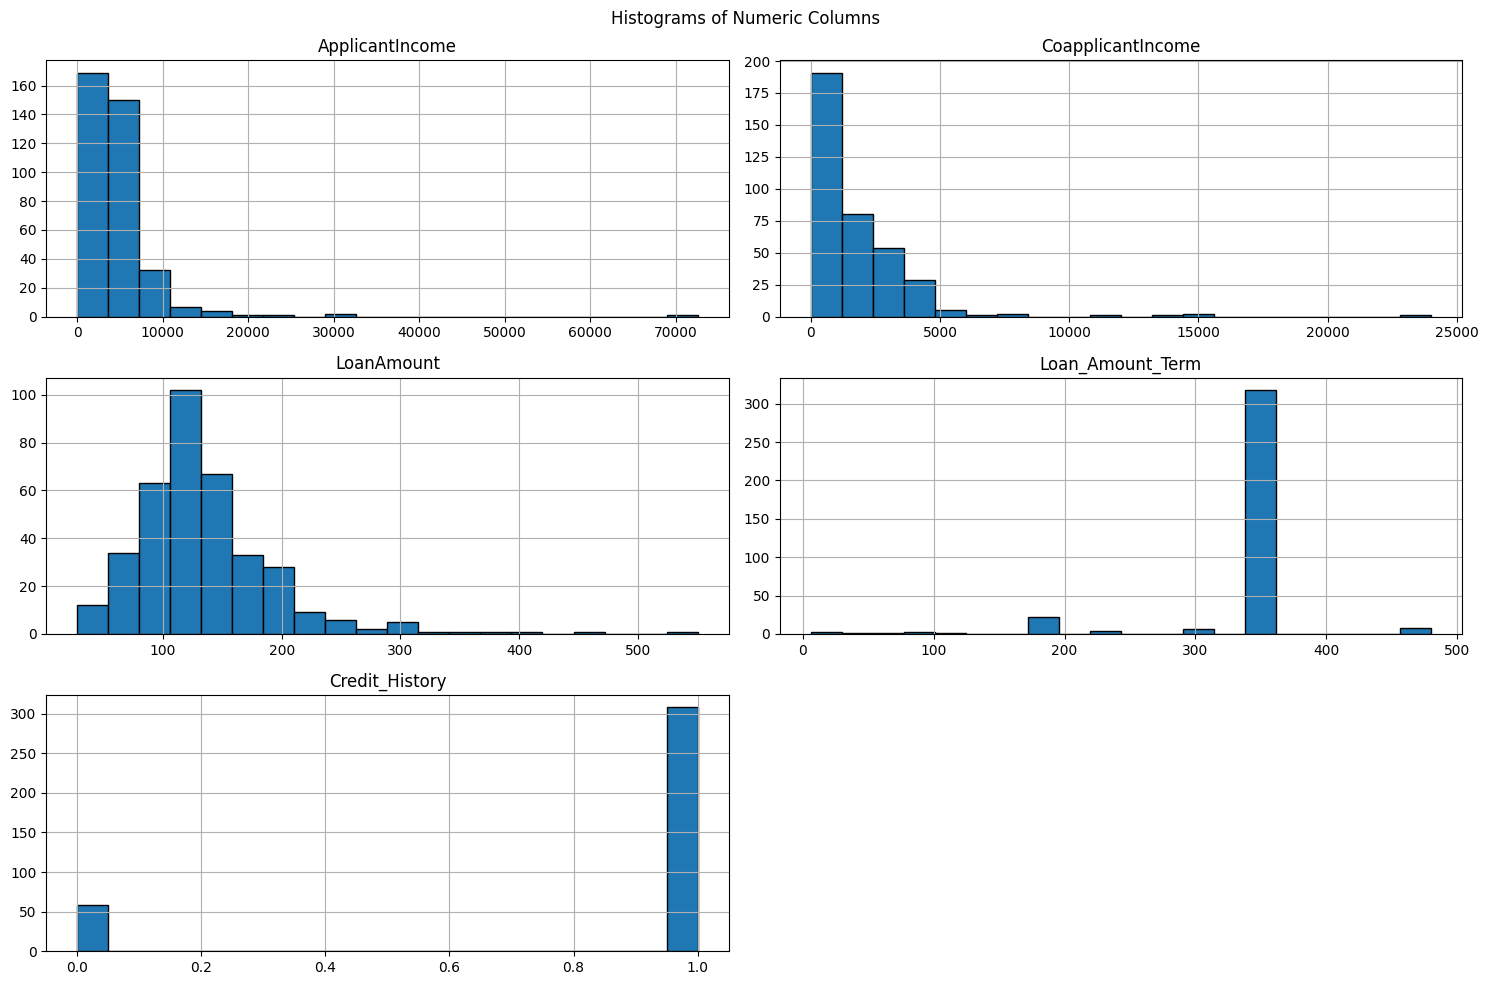

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df.select_dtypes(include='number').hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Columns')
plt.tight_layout()
plt.show()


4.2 Boxplots for Numeric Columns


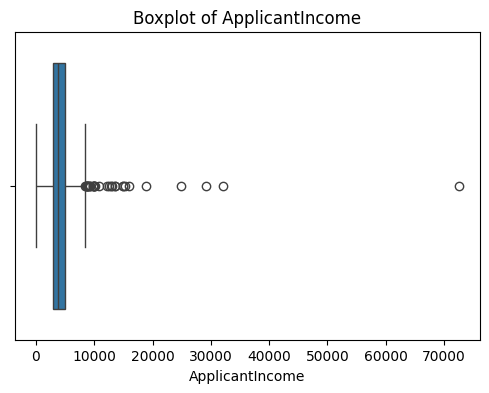

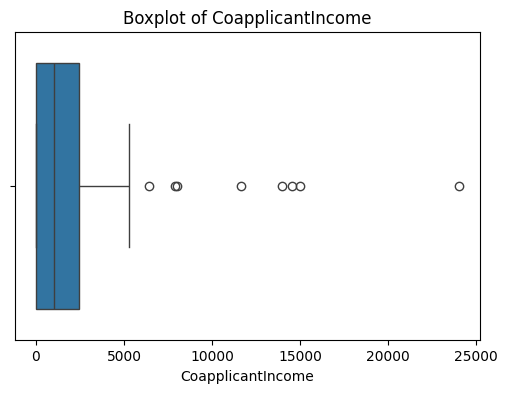

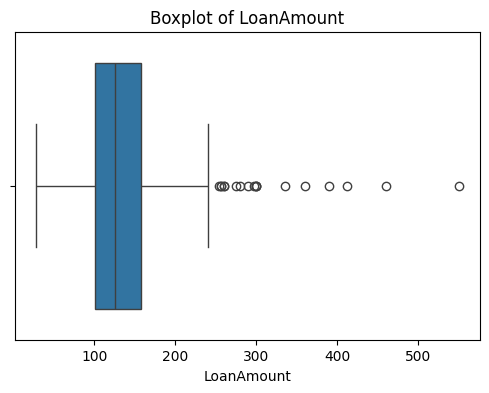

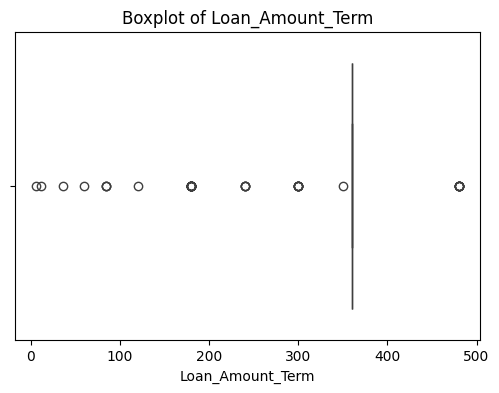

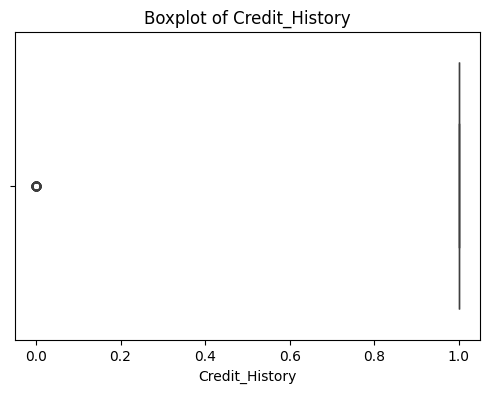

In [23]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


4.3 Bar Charts for Categorical Columns


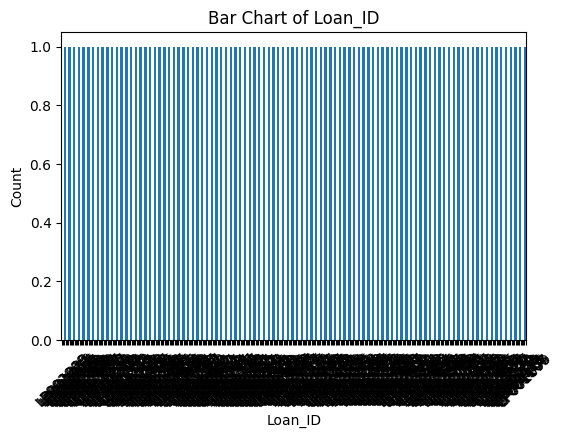

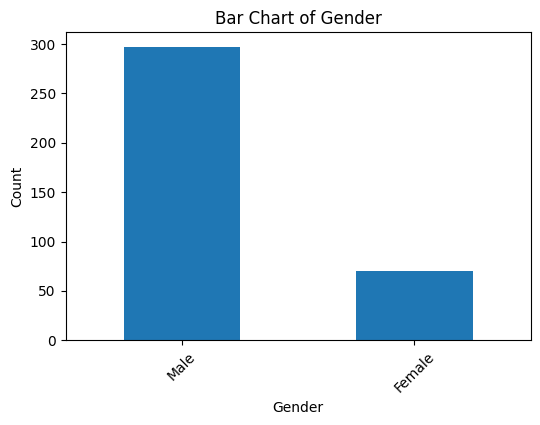

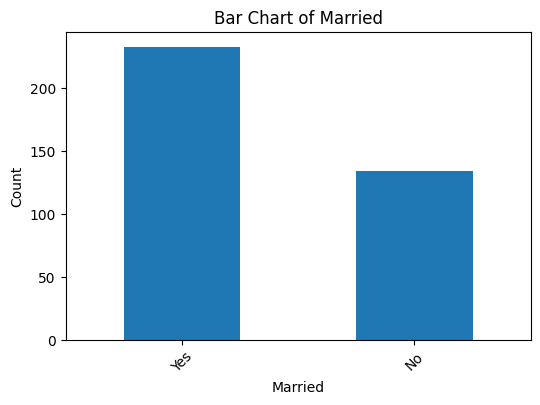

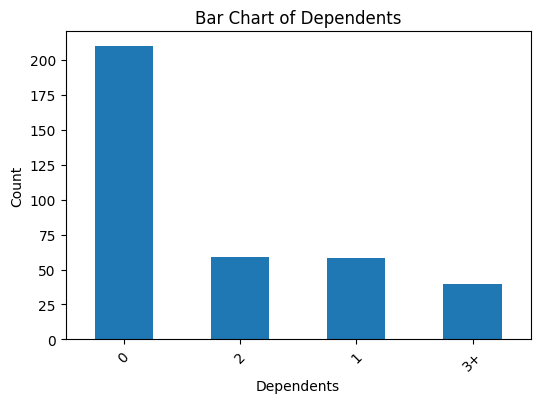

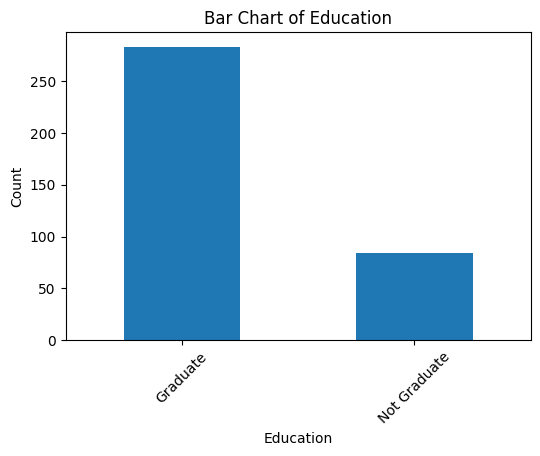

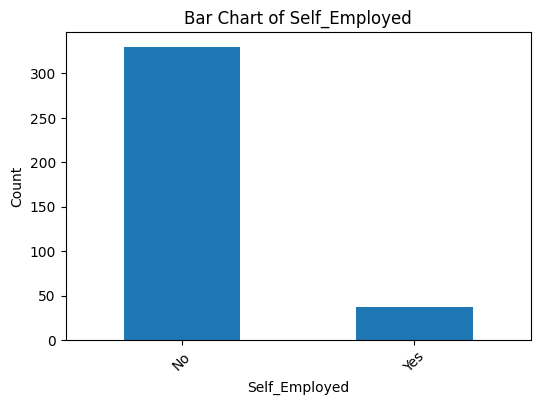

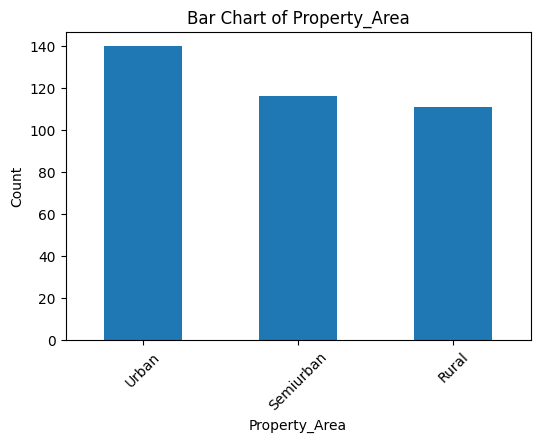

In [24]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()


4.4 Pie Charts for Categorical Columns


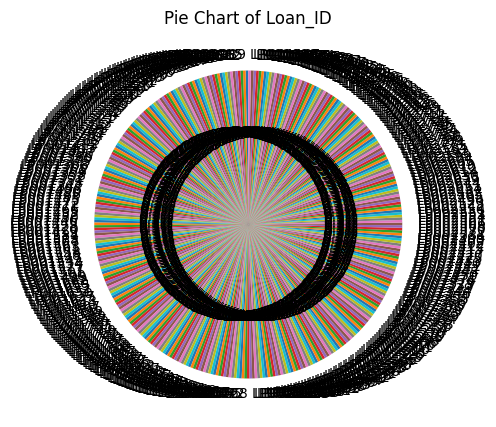

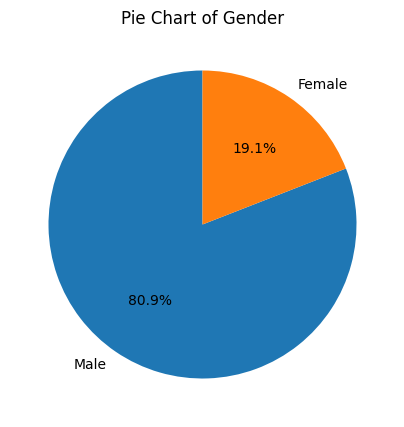

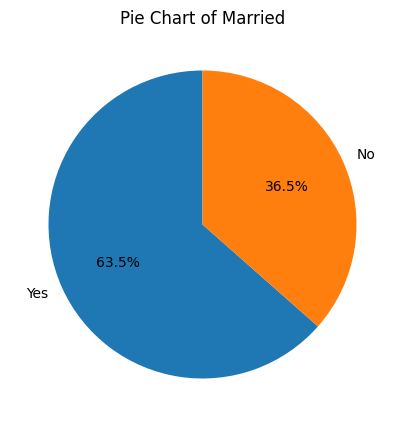

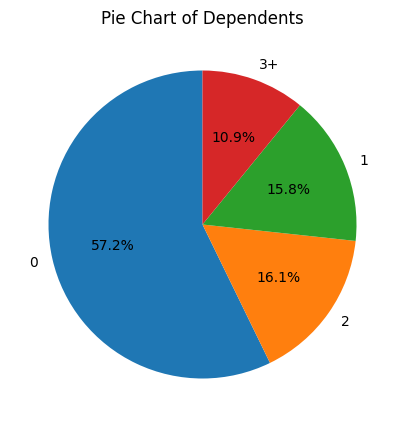

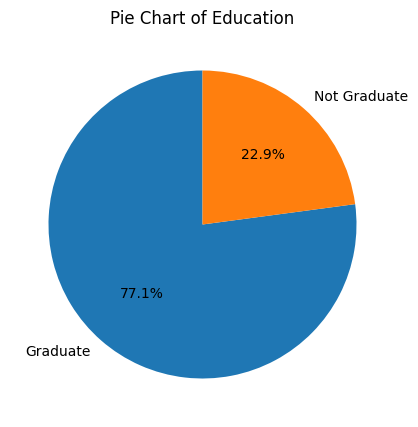

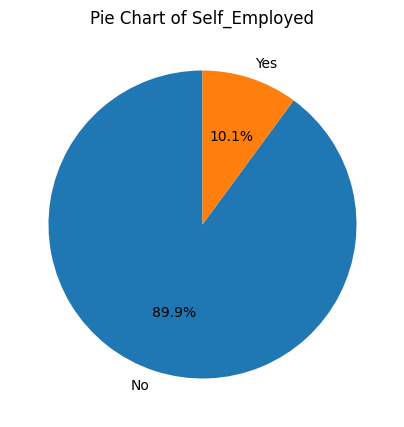

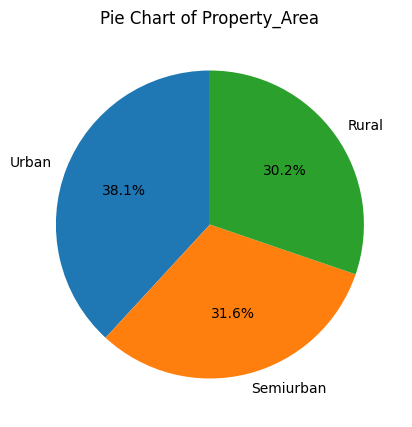

In [25]:
for col in categorical_cols:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()


Step 5: Bivariate Analysis
5.1 Scatter Plot Example


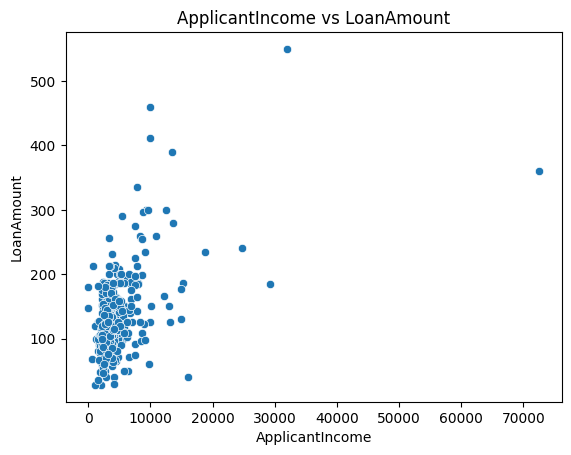

In [26]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.title('ApplicantIncome vs LoanAmount')
plt.show()


5.2 Pairplot


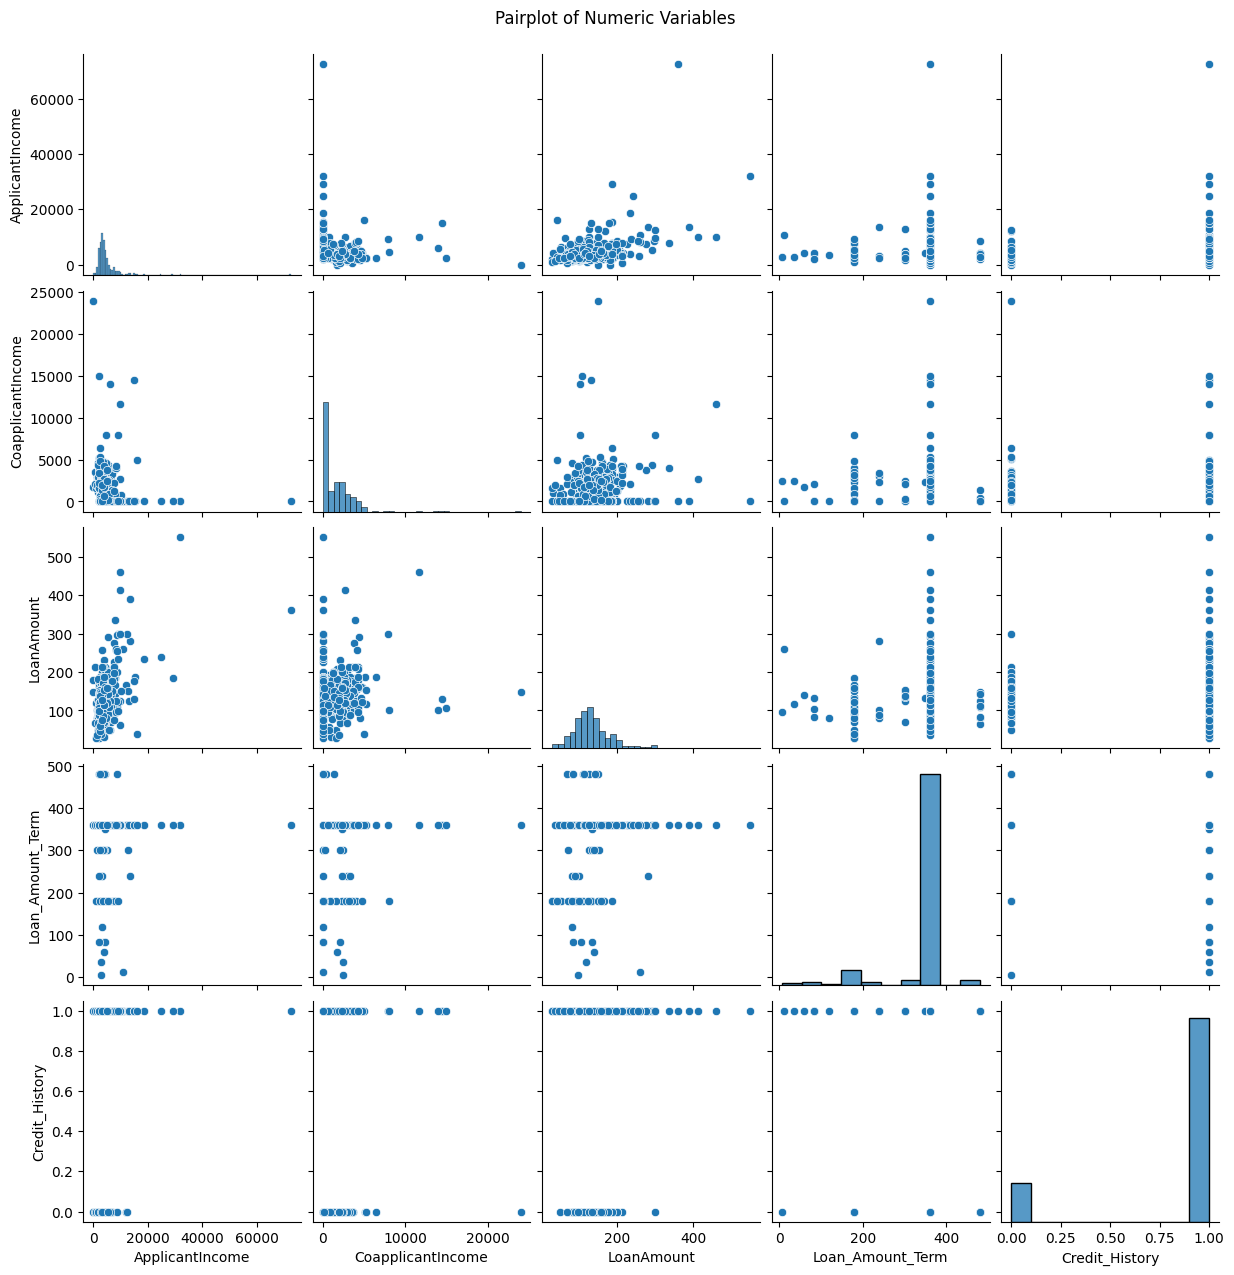

In [27]:
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


Step 6: Multivariate Analysis
6.1 Correlation Heatmap

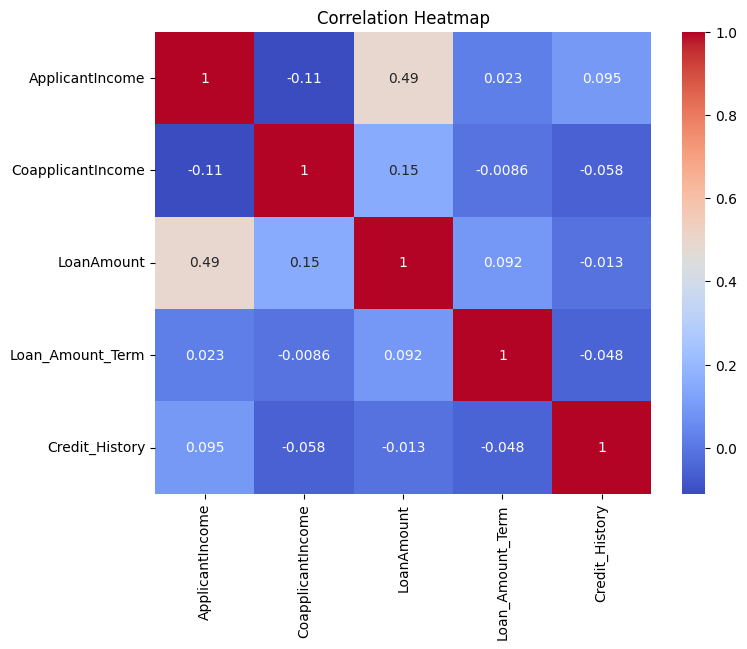

In [28]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


6.2 Stacked Bar Chart


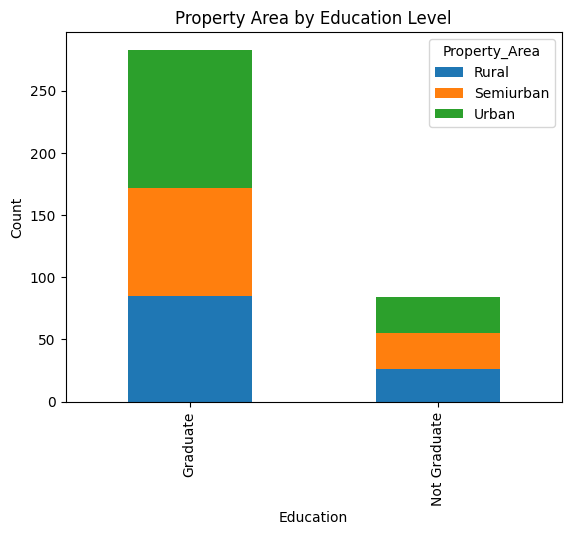

In [29]:
pd.crosstab(df['Education'], df['Property_Area']).plot(kind='bar', stacked=True)
plt.title('Property Area by Education Level')
plt.ylabel('Count')
plt.show()
